In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

# Data import

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255.0

In [8]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

# Model building

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer("dense") is hidden1

True

In [16]:
weights,biases = hidden1.get_weights()

In [17]:
weights

array([[-0.05032334,  0.03062891, -0.05754736, ...,  0.04567903,
        -0.0244818 , -0.06181802],
       [-0.01495697,  0.03898889,  0.06493072, ...,  0.00300671,
         0.06125247, -0.04554524],
       [ 0.04104658, -0.02300759,  0.03199084, ...,  0.0680175 ,
         0.00556946, -0.03597244],
       ...,
       [-0.02478901,  0.01271804,  0.06177919, ...,  0.05861183,
         0.04283158, -0.0697334 ],
       [ 0.02746256,  0.01564503,  0.02601057, ..., -0.06165169,
         0.04036914,  0.02451707],
       [-0.01554558,  0.06811233, -0.02392299, ...,  0.00417845,
         0.01374689, -0.04460657]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [22]:
history = model.fit(X_train,y_train,epochs = 30,validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7181 - accuracy: 0.7637 - val_loss: 0.5154 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4826 - accuracy: 0.8334 - val_loss: 0.4804 - val_accuracy: 0.8376
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4393 - accuracy: 0.8464 - val_loss: 0.4168 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4117 - accuracy: 0.8556 - val_loss: 0.4065 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3921 - accuracy: 0.8625 - val_loss: 0.3854 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3770 - accuracy: 0.8677 - val_loss: 0.3740 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3638 - accuracy: 0.8707 - val_loss: 0.3555 - val_accuracy:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

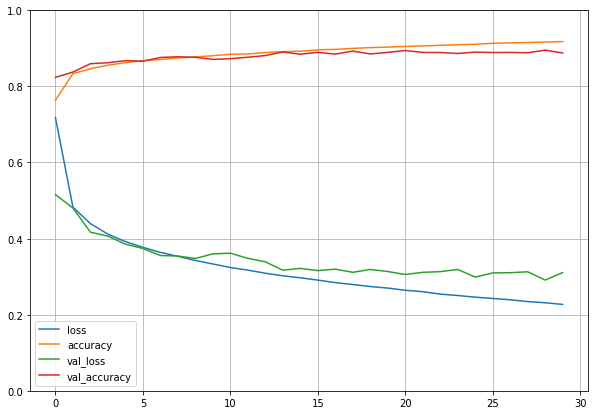

In [24]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
X_new = X_test[:3]

In [26]:
y_proba = model.predict(X_new)

In [27]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

# MLP regression

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
housing = fetch_california_housing()

In [31]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = 'relu',input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
    
])

In [35]:
model.compile(loss = 'mean_squared_error',optimizer = 'sgd')

In [37]:
history = model.fit(X_train,y_train,epochs = 20,validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0786 - val_loss: 0.6171
Epoch 2/20
363/363 [==============================] - 0s 867us/step - loss: 1.3317 - val_loss: 0.7251
Epoch 3/20
363/363 [==============================] - 0s 900us/step - loss: 0.5147 - val_loss: 0.5146
Epoch 4/20
363/363 [==============================] - 0s 899us/step - loss: 0.4603 - val_loss: 0.4828
Epoch 5/20
363/363 [==============================] - 0s 895us/step - loss: 0.4387 - val_loss: 0.4595
Epoch 6/20
363/363 [==============================] - 0s 948us/step - loss: 0.4271 - val_loss: 0.4483
Epoch 7/20
363/363 [==============================] - 0s 956us/step - loss: 0.4164 - val_loss: 0.4421
Epoch 8/20
363/363 [==============================] - 0s 895us/step - loss: 0.4090 - val_loss: 0.4342
Epoch 9/20
363/363 [==============================] - 0s 910us/step - loss: 0.4036 - val_loss: 0.4329
Epoch 10/20
363/363 [==============================] - 0s 914us/step - loss: 0.4060 

In [38]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 593us/step - loss: 0.3794


In [39]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [40]:
y_pred

array([[1.3706614],
       [2.6173577],
       [1.1465565]], dtype=float32)

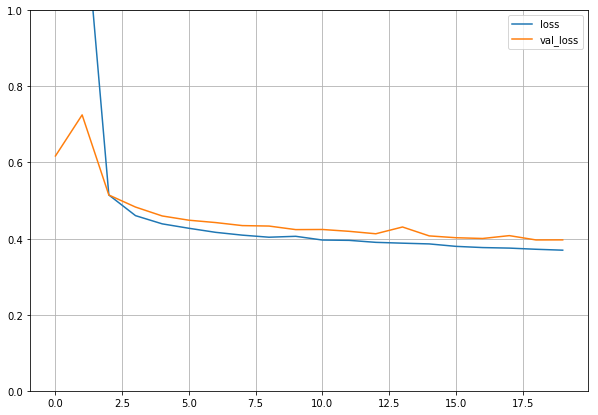

In [41]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Wide and deep model

In [45]:
X_train.shape[1:]

(8,)

In [44]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs = [output])

In [49]:
model.compile(loss = 'mse',optimizer = keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train,y_train,epochs = 20,validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 929us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 960us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 975us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 963us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 966us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 953us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 983us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 948us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 950us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

In [67]:
input_A = keras.layers.Input(shape = [5],name = 'wide_input')
input_B = keras.layers.Input(shape = [6],name = 'deep_input')
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name = 'output')(concat)
model = keras.Model(inputs=[input_A,input_B],outputs = [output])

In [68]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))

In [64]:
X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

In [54]:
history = model.fit((X_train_A,X_train_B),y_train,epochs = 20,
                   validation_data = ((X_valid_A,X_valid_B),y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.2184 - val_loss: 0.8817
Epoch 2/20
363/363 [==============================] - 0s 981us/step - loss: 0.7942 - val_loss: 0.7131
Epoch 3/20
363/363 [==============================] - 0s 975us/step - loss: 0.6419 - val_loss: 0.6498
Epoch 4/20
363/363 [==============================] - 0s 964us/step - loss: 0.5983 - val_loss: 0.6167
Epoch 5/20
363/363 [==============================] - 0s 978us/step - loss: 0.5690 - val_loss: 0.5899
Epoch 6/20
363/363 [==============================] - 0s 909us/step - loss: 0.5465 - val_loss: 0.5687
Epoch 7/20
363/363 [==============================] - 0s 973us/step - loss: 0.5314 - val_loss: 0.5529
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5176 - val_loss: 0.5408
Epoch 9/20
363/363 [==============================] - 0s 975us/step - loss: 0.5092 - val_loss: 0.5303
Epoch 10/20
363/363 [==============================] - 0s 993us/step - loss: 0.5014 - 

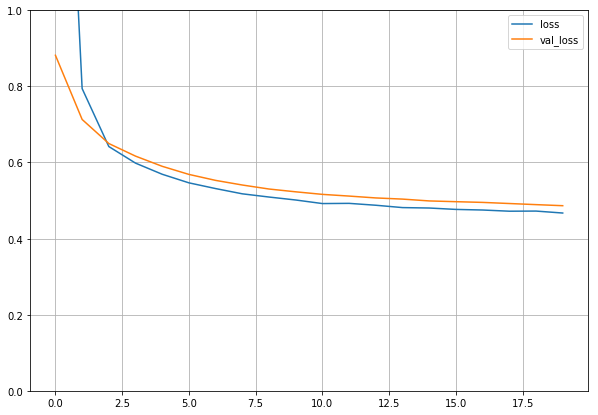

In [55]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [56]:
mse_test = model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 710us/step - loss: 0.4751


In [57]:
y_pred = model.predict((X_new_A,X_new_B))

In [58]:
y_pred

array([[1.4921361 ],
       [2.590654  ],
       [0.96115875]], dtype=float32)

# Checkpoints and early stopping

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only = True)
early_stopping = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights = True)
history = model.fit((X_train_A,X_train_B),y_train,epochs = 400,
                   validation_data = ((X_valid_A,X_valid_B),y_valid),
                   callbacks = [checkpoint_cb,early_stopping])

model = keras.models.load_model("my_keras_model.h5")

Epoch 1/400
363/363 [==============================] - 0s 1ms/step - loss: 0.3127 - val_loss: 0.3338
Epoch 2/400
363/363 [==============================] - 0s 1ms/step - loss: 0.3122 - val_loss: 0.3315
Epoch 3/400
363/363 [==============================] - 0s 1ms/step - loss: 0.3113 - val_loss: 0.3320
Epoch 4/400
363/363 [==============================] - 0s 984us/step - loss: 0.3130 - val_loss: 0.3332
Epoch 5/400
363/363 [==============================] - 0s 1ms/step - loss: 0.3114 - val_loss: 0.3314
Epoch 6/400
363/363 [==============================] - 0s 996us/step - loss: 0.3118 - val_loss: 0.3315
Epoch 7/400
363/363 [==============================] - 0s 982us/step - loss: 0.3123 - val_loss: 0.3339
Epoch 8/400
363/363 [==============================] - 0s 983us/step - loss: 0.3146 - val_loss: 0.3316
Epoch 9/400
363/363 [==============================] - 0s 973us/step - loss: 0.3116 - val_loss: 0.3316
Epoch 10/400
363/363 [==============================] - 0s 987us/step - loss: 0.3

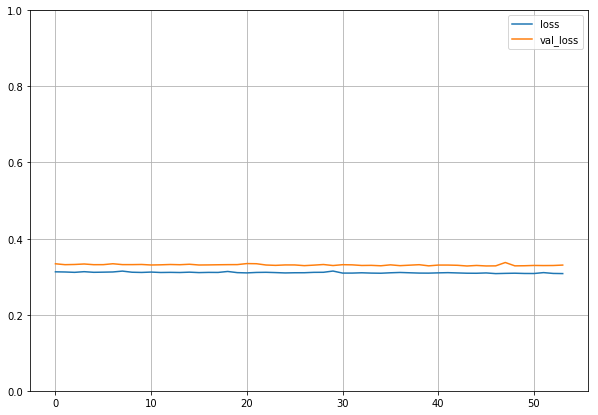

In [72]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Tuning hyperparameters _is_ the game

The art of finding a good neural network in deep learning, is simply finding a good _architecture_ for your model. Since the search space is so vast, you need to use a smart strategy to come up with nice hyperparameters.


### Automating data preparation
If this can be effectively automated, the only thing that remains is essentially data preparation.

In order for automatic detection and structuring of data, what is needed over a datset is an orderd _filtration_ of the data points, that show when information was avaiable. Let the filtration be a function from a data points in $X$ to $\mathbb{N}$. Then you are only alowed to use prediciton of a datapoint $x_i$ if $f(x_i) \geq f(x_j)$.

# Training deep neural networks

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation = 'elu',kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation = 'elu',kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation = 'softmax' )
]
)

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_23 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dense_24 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dense_25 (Dense)             (None, 10)               